In [1]:
import bz2
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
"the path file is decompressed from quotes-2020-domains.json.bz2, and we use data to read the file"
path = 'quotes-2020-domains.json'
data = []
for line in open(path, 'r'):
    data.append(json.loads(line))

## a) select the urls and analyse the distribution

In [3]:
"This code is used to extract the information from the urls can get the main imformation of urls"
# http:// + main information + / + details -> main information
urls = []
for i in range(len(data)):
    urls.append(data[i]["urls"])
    
url1 = []
for i in range(len(urls)):   
    url1.append(urls[i][0][urls[i][0].index("//"):])

url2 = []
for i in range(len(url1)):   
    url2.append(url1[i][2:])

url_sample = []
for i in range(len(url2)):   
    try:
        url_sample.append(url2[i][:url2[i].index('/')])
    except:
        print(i) # print the index of urls where not have a "/" after the main information

87448
735740
786494
800756
871791
1042621
1112261
1114795
1159309
1174151
1237674
1442340
1575324
1800589
1819775
1856809
1915368
2049979
2139215
2208062
2425742
2438437
2456994
2690125
2710012
2712024
2884305
3277789
3443471
3635849
3688676
3711873
3736197
3906279
3944420
4048033
4069961
4193828
4403699
4831264
4998896
5073036
5125905
5135919
5241514


In [4]:
url_sample1 = url_sample # take the all rows

In [5]:
url_sample_distinct = list(set(url_sample1)) 
count = []

for i in url_sample_distinct:
    t = url_sample1.count(i)
    count.append(t)

In [6]:
df = pd.DataFrame(columns=['urls', 'counts'])
df['urls'] = url_sample_distinct
df['counts'] = count

In [7]:
df = df.sort_values(by = 'counts', ascending=False)
df.reset_index(inplace=True)

In [8]:
df

,index,urls,counts
0,4695,www.breitbart.com,44371
1,8510,www.msn.com,38730
2,12676,express.co.uk,32279
3,9345,msn.com,28687
4,10746,www.seattletimes.com,25936
...,...,...,...
13784,11780,revstephanietemplinashford.wordpress.com,1
13785,9526,celebritynewsgh.wordpress.com,1
13786,5327,peabodyinstitute.wordpress.com,1
13787,2529,huntthedevil.wordpress.com,1


In [9]:
df_sample = df[:10]

Text(0.5, 1.0, 'The number of times appear for top 10 News Vendors')

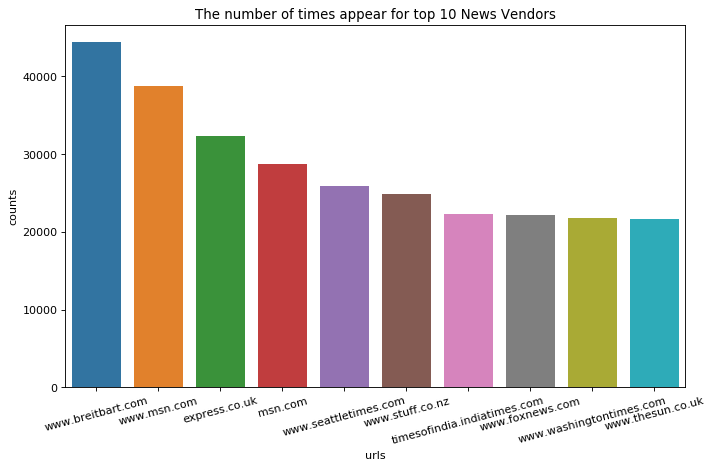

In [42]:
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(x="urls", y="counts", data=df_sample)
plt.xticks(rotation='15')
plt.title("The number of times appear for top 10 News Vendors")

Text(0.5, 1.0, 'The distribution of times appear for different News Vendors')

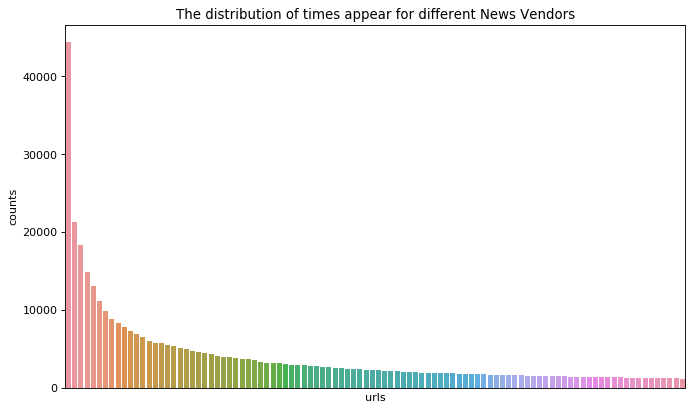

In [44]:
plt.figure(figsize=(10, 6), dpi=80)
ax = sns.barplot(x="urls", y="counts", data=df[:1000:10])
plt.xticks([])
plt.title("The distribution of times appear for different News Vendors")

## b)do the same thing for the speaker

In [93]:
person = []
for i in range(len(data)):
    person.append(data[i]["speaker"])

In [94]:
person = person[:100000]

In [95]:
person_distinct = list(set(person)) 
counts = []

for i in person_distinct:
    t = url_sample1.count(i)
    counts.append(t)

In [96]:
df1 = pd.DataFrame(columns=['person', 'counts'])
df1['person'] = person_distinct
df1['counts'] = counts

In [97]:
df1 = df1.sort_values(by = 'counts', ascending=False)

In [102]:
df1.reset_index(inplace=True)

In [104]:
df1[:8]

,index,person,counts
0,28823,None,34316
1,32759,President Donald Trump,567
2,30214,Joe Biden,266
3,8457,Bernie Sanders,258
4,8871,President Trump,225
5,17609,Andrew Cuomo,205
6,16247,Elizabeth Warren,160
7,13820,Narendra Modi,149


## c) choose the urls according to the top popular speaker

In [100]:
## 1 President Donald Trump&President Trump
## 2 Joe Biden
## 3 Bernie Sanders
## 4 Andrew Cuomo
## 5 Elizabeth Warren
## 6 Narendra Modi
## 7 Scott Morrison
## 8 Mike Pompeo

In [105]:
person_urls = []
for i in range(len(data)):
    person_urls.append(data[i]["speaker"])
    person_urls.append(data[i]["urls"])

### 1 first, we collect the urls conected to trump

In [125]:
trump_urls = []
for i in range(int(len(person_urls)/2)):
    if person_urls[2*i] == 'President Donald Trump':
        trump_urls.append(person_urls[2*i+1])
    if person_urls[2*i] == 'President Trump':
        trump_urls.append(person_urls[2*i+1])

In [128]:
trump_url1=[]
for i in range(len(trump_urls)):   
    trump_url1.append(trump_urls[i][0][trump_urls[i][0].index("//"):])

trump_url2 = []
for i in range(len(trump_url1)):   
    trump_url2.append(trump_url1[i][2:])

trump_url_sample = []
for i in range(len(trump_url2)):   
    try:
        trump_url_sample.append(trump_url2[i][:trump_url2[i].index('/')])
    except:
        print(i) # print the index of urls where not have a "/" after the main information

In [130]:
trump_url_distinct = list(set(trump_url_sample)) 
trump_counts = []

for i in trump_url_distinct:
    t = trump_url_sample.count(i)
    trump_counts.append(t)

In [134]:
trump_df = pd.DataFrame(columns=['urls', 'counts'])
trump_df['urls'] = trump_url_distinct
trump_df['counts'] = trump_counts
trump_df = trump_df.sort_values(by = 'counts', ascending=False)
trump_df.reset_index(inplace=True)

In [144]:
trump = trump_df['urls'][:10]

### 2 then, we collect the urls conected to biden

In [137]:
biden_urls = []
for i in range(int(len(person_urls)/2)):
    if person_urls[2*i] == 'Joe Biden':
        biden_urls.append(person_urls[2*i+1])

In [138]:
biden_url1=[]
for i in range(len(biden_urls)):   
    biden_url1.append(biden_urls[i][0][biden_urls[i][0].index("//"):])

biden_url2 = []
for i in range(len(biden_url1)):   
    biden_url2.append(biden_url1[i][2:])

biden_url_sample = []
for i in range(len(biden_url2)):   
    try:
        biden_url_sample.append(biden_url2[i][:biden_url2[i].index('/')])
    except:
        print(i) # print the index of urls where not have a "/" after the main information

In [140]:
biden_url_distinct = list(set(biden_url_sample)) 
biden_counts = []

for i in biden_url_distinct:
    t = biden_url_sample.count(i)
    biden_counts.append(t)

biden_df = pd.DataFrame(columns=['urls', 'counts'])
biden_df['urls'] = biden_url_distinct
biden_df['counts'] = biden_counts
biden_df = biden_df.sort_values(by = 'counts', ascending=False)
biden_df.reset_index(inplace=True)

In [145]:
biden = biden_df['urls'][:10]

In [152]:
trump_df[:10]

,index,urls,counts
0,768,www.breitbart.com,1044
1,1123,www.msn.com,941
2,91,feeds.foxnews.com,733
3,1793,thehill.com,712
4,874,www.rawstory.com,700
5,1909,www.washingtonexaminer.com,624
6,352,hypervocal.com,591
7,2434,www.foxnews.com,574
8,1798,www.nbcnews.com,541
9,1575,www.newsmax.com,499


In [150]:
biden_df[:10]

,index,urls,counts
0,531,uspolitics.einnews.com,602
1,868,www.msn.com,434
2,148,feeds.foxnews.com,383
3,119,www.washingtonexaminer.com,353
4,267,www.breitbart.com,341
5,958,www.nbcnews.com,329
6,1028,www.foxnews.com,241
7,950,thehill.com,226
8,573,hypervocal.com,217
9,991,cnn.com,186


### 3 we plot different counts for  selected urls according to these two person

In [182]:
# www.breitbart.com
# www.msn.com
# feeds.foxnews.com
# thehill.com
# uspolitics.einnews.com
# www.foxnews.com
# www.breitbart.com
# www.nbcnews.com
x = ['www.breitbart.com','www.msn.com','feeds.foxnews.com','thehill.com','uspolitics.einnews.com','hypervocal.com']
y1 = []
for i in x:
    y1.append(int(trump_df[trump_df['urls']==i]['counts']))

In [183]:
y2 = []
for i in x:
    y2.append(int(biden_df[biden_df['urls']==i]['counts']))

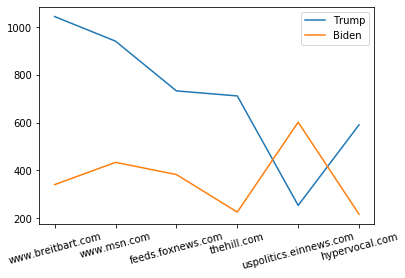

In [190]:
plt.plot(x,y1,label='Trump')
plt.plot(x,y2,label='Biden')
plt.xticks(rotation='15')
plt.legend()